In [106]:
# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


In [107]:
api_key = '3286c138a388ef8b9e598517a438a480860463e3'

In [108]:
url = 'https://api.census.gov/data/2013/acs1?get=NAME,B01003_001E,B25004_001E,B25077_001E,B25035_001E,B10010_001E,B15003_022E,B15003_017E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B21001_002E,B21001_003E,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E,B05001_002E,B05001_006E,B17001_002E,B24050_002E,B24050_005E,B24050_006E,B24050_007E,B24050_008E,B24050_009E,B24050_012E,B24050_013E,B24050_016E,B24050_020E,B24050_023E,B24050_027E,C23022_001E,B05002_013E&for=congressional%20district:*&key='

key_url = url + api_key

In [109]:

columns = {'NAME': 'Name of District',
            'B01003_001E' : 'Total Population',
            'B25004_001E' : 'Vacant Housing Units',
            'B25077_001E' : 'Median Home Value',
            'B25035_001E' : 'Median Year Sructures Built',
            'B10010_001E' : 'Median Income',
            'B15003_022E' : 'Total w/ Bachelors',
            'B08013_001E' : 'Movers to different state',
            'B08131_001E' : 'Aggregrate Travel Time to Work',
            'metropolitan statistical area/micropolitan statistical area' : 'Area ID',
            "B15003_021E":"Associates Degree", 
            "B15003_017E":"High School Diploma", 
            "B15003_022E":"Bachelor's", 
            "B15003_023E":"Masters" , 
            "B15003_024E":"Professional" , 
            "B15003_025E":"Doctorate",
            "B21001_002E": "Veteran",
            "B21001_003E": "Non-Veteran",
            "B02008_001E":"White", 
            "B02009_001E":"African American",
            "B02010_001E":"Native American/Alaskan",
            "B02011_001E":"Asian",
           "B02012_001E": "Native Hawaiian/Pacific Islander",
            "B02013_001E":"OtherRace",
            "B05001_002E" : "U.S. citizen",
            'B05001_006E' : 'Non U.S. citizen',
            "B17001_002E" : "Income in the past 12 months below poverty level",
            "B24050_002E" : "Agriculture, forestry, fishing and hunting, and mining",
            "B24050_005E" : "Construction",
            "B24050_006E" : "Manufacturing",
            "B24050_007E" : "Wholesale Trade",
            "B24050_008E" : "Retail Trade",
            "B24050_009E" : "Transportation and warehousing, and utilities",
            "B24050_012E" : "INFORMATION",
            "B24050_013E" : "Finance and insurance, and real estate and rental and leasing",
            "B24050_016E" : "Professional, scientific, and management, and administrative and waste management services",  
            "B24050_020E" : "Educational services, and health care and social assistance",
            "B24050_023E" : "Arts, entertainment, and recreation, and accommodation and food services",
            "B24050_027E" : "Public Administration",
           "C23022_001E" : "Total Unemployed",
           "B05002_013E" : "Foreign Born",
           #"B05001_002E" : "U.S. citizen, born in the United States"
           
           
          }


In [110]:
census_response = requests.get(key_url)
census_json = census_response.json()

dataFrame =pd.DataFrame(census_json)
dataFrame.columns = dataFrame.iloc[0]
dataFrame = dataFrame.drop([0])
dataFrame = dataFrame.rename(columns=columns)

In [111]:
dataFrame.head()


,Name of District,Total Population,Vacant Housing Units,Median Home Value,Median Year Sructures Built,Median Income,Bachelor's,High School Diploma,Associates Degree,Bachelor's,...,INFORMATION,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services",Public Administration,Total Unemployed,Foreign Born,state,congressional district
1,"Congressional District 1 (113th Congress), Ala...",695176,77737,130700,1984,40803,72934,126702,42633,72934,...,3999,15888,25525,64078,30570,11190,441069,18083,01,01
2,"Congressional District 2 (113th Congress), Ala...",690074,48013,112400,1983,45489,57610,120918,36495,57610,...,4034,12942,20555,59887,24293,24652,441141,18314,01,02
3,"Congressional District 3 (113th Congress), Ala...",697761,53146,111700,1984,46421,55675,122707,32578,55675,...,3932,14637,21083,67465,27035,18921,459735,21192,01,03
4,"Congressional District 4 (113th Congress), Ala...",685175,52293,102600,1979,44536,46061,127289,42214,46061,...,3481,10358,18184,59296,17977,11396,432636,28097,01,04
5,"Congressional District 5 (113th Congress), Ala...",701220,32654,141500,1984,45891,90232,103980,39078,90232,...,5425,13300,42708,61177,22079,21636,458603,30418,01,05


In [112]:
#covert isolated dataframe to numeric
isolated = dataFrame[(dataFrame['Name of District'] == "Congressional District 45 (113th Congress), California")]
isoNumeric = isolated['Total Population']   
isoNumeric = pd.to_numeric(isoNumeric)

In [113]:
#find average population of congressional district
s = dataFrame['Total Population']
s = pd.to_numeric(s)
avg_pop = s.mean()
avg_pop

731679.4622425629

In [114]:
#find population of irvine congress district
isolated_pop = isolated['Total Population'].mean()
isolated_pop

733706.0

In [115]:
popNames = ['Congressional District 45', 'Average']
popNums = [isolated_pop, avg_pop]

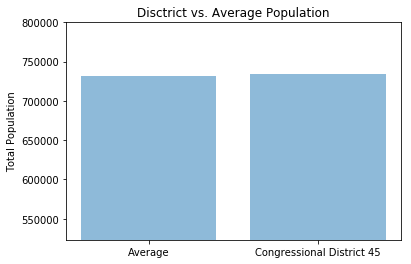

In [116]:
plt.bar(popNames, popNums, align='center', alpha=0.5)
plt.ylabel('Total Population')
plt.title('Disctrict vs. Average Population')
axes = plt.gca()
min_pop = s.min()
max_pop = s.max()
axes.set_ylim([min_pop,800000])
plt.show()

In [117]:
citizenship_df = dataFrame[(dataFrame['Name of District'] == "Congressional District 45 (113th Congress), California")]
citizenship_df.head()

,Name of District,Total Population,Vacant Housing Units,Median Home Value,Median Year Sructures Built,Median Income,Bachelor's,High School Diploma,Associates Degree,Bachelor's,...,INFORMATION,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services",Public Administration,Total Unemployed,Foreign Born,state,congressional district
66,"Congressional District 45 (113th Congress), Ca...",733706,12889,590200,1983,None,154514,66484,40930,154514,...,12175,37910,61218,79264,32789,9930,492282,195827,06,45


In [118]:
dataFrame.columns

Index(['Name of District', 'Total Population', 'Vacant Housing Units',
       'Median Home Value', 'Median Year Sructures Built', 'Median Income',
       'Bachelor's', 'High School Diploma', 'Associates Degree', 'Bachelor's',
       'Masters', 'Professional', 'Doctorate', 'Veteran', 'Non-Veteran',
       'White', 'African American', 'Native American/Alaskan', 'Asian',
       'Native Hawaiian/Pacific Islander', 'OtherRace', 'U.S. citizen',
       'Non U.S. citizen', 'Income in the past 12 months below poverty level',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and warehousing, and utilities', 'INFORMATION',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainm

In [119]:
citizenship_df1 = citizenship_df[['U.S. citizen', 'Non U.S. citizen','Veteran','Non-Veteran','Foreign Born']]
citizenship_df1

#new_dataset = isolated[['A','D']].copy()

,U.S. citizen,Non U.S. citizen,Veteran,Non-Veteran,Foreign Born
66,529445,76680,32951,542400,195827


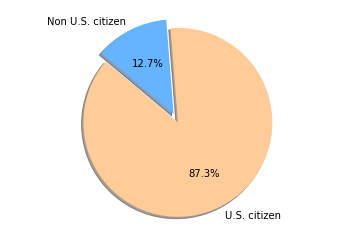

In [120]:
## Citizenship Data

labels = ["U.S. citizen", "Non U.S. citizen"]

# The values of each section of the pie chart
sizes = [529445, 76680]

# The colors of each section of the pie chart
#colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "black", "brown",]
colors = ["#ffcc99", "#66b3ff"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig("CitizenData.png")
plt.show()

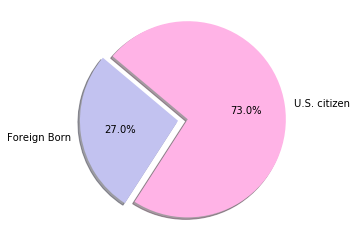

In [124]:
## Immigration Data
labels1 = ["Foreign Born", "U.S. citizen"]

# The values of each section of the pie chart
sizes = [195827, 529445]

# The colors of each section of the pie chart

colors = ["#c2c2f0", "#ffb3e6"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels1, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("ImmigrationData.png")
plt.show()